# Featurization, Model Selection & Tuning - Linear Regression

**Why is regularization required ?**

We are well aware of the issue of 'Curse of dimensionality', where the no. of columns are so huge that the no. of rows does not cover all the permutation and combinations that is applicable for this dataset.
For eg: Data having 10 columns should have 10! rows but it has only 1000 rows

Therefore,when we depict this graphically there would be lot of white spaces as the datapoints for those regions may not be covered in the dataset.

If a  linear regression model is tested over such a data, the model will tend to overfit this data by having sharp peaks & slopes. Such a model would have 100% training accuracy but would definitely fail in the test environment.

Thus arose the need of introducing slight errors in the form of giving smooth bends instead of sharp peaks (thereby reducing overfit).This is achieved by tweaking the model parameters (coefficients) and the hyperparameters (penalty factor). 

## Agenda

* Perform basic EDA
* Scale data and apply Linear, Ridge & Lasso Regression with Regularization 
* Compare the r^2 score to determine which of the above regression methods gives the highest score
* Compute Root mean squared error (RMSE) which inturn gives a better score than r^2
* Finally use a scatter plot to graphically depict the correlation between actual and predicted mpg values

# 1. Import packages 

In [1]:
#Import numerical libraries
import pandas as pd 
import numpy as np

# import graphical plotting libraries 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# import linear regression machine learning libraries 
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score



# 2. load dataset 

In [2]:
data = pd.read_csv(r"C:\Users\ky321\OneDrive\Desktop\Data science and Ai\Machine Learning\lasso & Ridge Regularisation\car-mpg.csv")
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


* Drop car name
* Replace origin into 1,2,3.. dont forget get_dummies
* Replace ? with nan
* Replace all nan with median

In [3]:
data = data.drop(['car_name'],axis=1)
data['origin'] = data['origin'].replace({1:'america',2:'eruope',3:'asia'})
data = pd.get_dummies(data,columns=['origin'])
data =data.replace('?',np.nan)
data = data.apply(pd.to_numeric, errors='coerce')
data = data.apply(lambda x : x.fillna(x.median()),axis=0)

In [4]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_eruope
0,18.0,8,307.0,130.0,3504,12.0,70,0,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,0,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,0,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,0,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,0,True,False,False


We have to predict the mpg column given the features.

# 3. Model building

Here we would like to scale the data as the columns are varied which would result in 1 column dominating the others.

First we divide the data into independent (X) and dependent data (y) then we scale it. 

#### Tip!: ####

*The reason we don't scale the entire data before and then divide it into train(X) & test(y) is because once you scale the data, the type(data_s) would be numpy.ndarray. It's impossible to divide this data when it's an array. 
*

Hence we divide type(data) pandas.DataFrame, then proceed to scaling it.

In [5]:
x = data.drop(['mpg'],axis=1) # independent varibale 
y = data[['mpg']] # dependent varibale 

# scaling the data 

In [6]:
x_s = preprocessing.scale(x)
x_s =pd.DataFrame(x_s,columns = x.columns) # converting scaled data into  data frame

y_s = preprocessing.scale(y)
y_s =pd.DataFrame(y_s,columns = y.columns )# ideally train data should be in columns  

# split into train , test set

In [7]:
x_train,x_test ,y_train,y_test = train_test_split(x_s,y_s,test_size=0.30,random_state=1)
x_train.shape

(278, 10)

# 3.a Simple linear model

In [8]:
#Fit simple linear model and find coefficients
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

for idx,col_name in enumerate(x_train.columns):
    print('The coefficient for {} is {}'.format(col_name,regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print("The intercept is {}".format(intercept)) 

The coefficient for cyl is 0.32102238569161057
The coefficient for disp is 0.324834309184838
The coefficient for hp is -0.22916950059437718
The coefficient for wt is -0.7112101905072288
The coefficient for acc is 0.014713682764190883
The coefficient for yr is 0.3755811949510743
The coefficient for car_type is 0.3814769484233099
The coefficient for origin_america is -0.07472247547584182
The coefficient for origin_asia is 0.044515252035678216
The coefficient for origin_eruope is 0.04834854953945382
The intercept is 0.0192841161036397


# 3.b Regularized Ridge Regression

In [9]:
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

ridge_model = Ridge(alpha=0.3)
ridge_model.fit(x_train,y_train)

print('Ridge model coef :{}'.format(ridge_model.coef_))
#as the data has 10 columns hence 10 coefficient  appears here 


Ridge model coef :[ 0.31649043  0.31320707 -0.22876025 -0.70109447  0.01295851  0.37447352
  0.37725608 -0.07423624  0.04441039  0.04784031]


# 3.c Regularized Lasso Regression

In [10]:
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)

print('Lasso model coef: {}'.format(lasso_model.coef_))
# #As the data has 10 columns hence 10 coefficients appear here

Lasso model coef: [-0.         -0.         -0.01690287 -0.51890013  0.          0.28138241
  0.1278489  -0.01642647  0.          0.        ]


Here we notice many coefficients are turned to 0 indicating drop of those dimensions from the model

# 4. Score Comparison

In [11]:
# Model score  - r^2 or coeff of determinat
# r^2 = 1-(RSS/TSS) = regression error /TSS

# simple linear model
print(regression_model.score(x_train,y_train))
print(regression_model.score(x_test,y_test))

print('*********************')
#Ridge
print(ridge_model.score(x_train,y_train))
print(ridge_model.score(x_test,y_test))

print("*********************")
#Lasso
print(lasso_model.score(x_train,y_train))
print(lasso_model.score(x_test,y_test))

0.8343770256960538
0.8513421387780067
*********************
0.8343617931312616
0.8518882171608508
*********************
0.7938010766228453
0.8375229615977083


## Polynomial Features

If you wish to further compute polynomial features, you can use the below code.

In [12]:
poly = PolynomialFeatures(degree = 2, interaction_only = True)

# Fit calculates u and std dev while transform applies the transformation to a particular set of examples
# Here fit_transform helps to fit and transform the X_s
# Hence type(X_poly) is numpy.array while type(X_s) is pandas.DataFrame 
X_poly = poly.fit_transform(x_s)
# Similarly capture the coefficients and intercepts of this polynomial feature model

# 5. Model Parameter Tuning

* r^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no influence on the predicted variable. Instead we use adjusted r^2 which removes the statistical chance that improves r^2 

(adjusted r^2 = r^2 - fluke)
* Scikit does not provide a facility for adjusted r^2... so we use statsmodel, a library that gives results similar to what you obtain in R language
* This library expects the X and Y to be given in one single dataframe

In [13]:
data_train_test = pd.concat([x_train,y_train],axis=1)
data_train_test.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_eruope,mpg
350,-0.856321,-0.849116,-1.081977,-0.893172,-0.242570,1.351199,0.941412,0.773559,-0.497643,-0.461968,1.432898
59,-0.856321,-0.925936,-1.317736,-0.847061,2.879909,-1.085858,0.941412,-1.292726,-0.497643,2.164651,-0.065919
120,-0.856321,-0.695475,0.201600,-0.121101,-0.024722,-0.815074,0.941412,-1.292726,-0.497643,2.164651,-0.578335
12,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
349,-0.856321,-0.983552,-0.951000,-1.165111,0.156817,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.356035


In [16]:
import statsmodels.formula.api as smf
ols1 =smf.ols(formula='mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_eruope+origin_asia+mpg', data = data_train_test).fit()
ols1.params

Intercept        -3.336090e-16
cyl              -6.800116e-16
disp              7.389922e-16
hp                2.593412e-16
wt               -5.065393e-16
acc              -1.032160e-16
yr                9.454243e-17
car_type         -5.724587e-17
origin_america    7.155734e-17
origin_eruope     6.722053e-17
origin_asia      -3.816392e-17
mpg               1.000000e+00
dtype: float64

In [17]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.341e+32
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:50:16   Log-Likelihood:                 9429.3
No. Observations:                 278   AIC:                        -1.884e+04
Df Residuals:                     267   BIC:                        -1.880e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.336e-16   2.77e-17    -12.

In [18]:
#Lets check Sum of Squared Errors (SSE) by predicting value of y for test cases and subtracting from the actual y for the test cases
mse =np.mean((regression_model.predict(x_test)-y_test)**2)

# # root of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
rmse = math.sqrt(mse)
print('Root mean squared error: {}'.format(rmse))

Root mean squared error: 0.3776693425408783


**So there is an avg. mpg difference of 0.37 from real mpg**

<Axes: xlabel='acc', ylabel='mpg'>

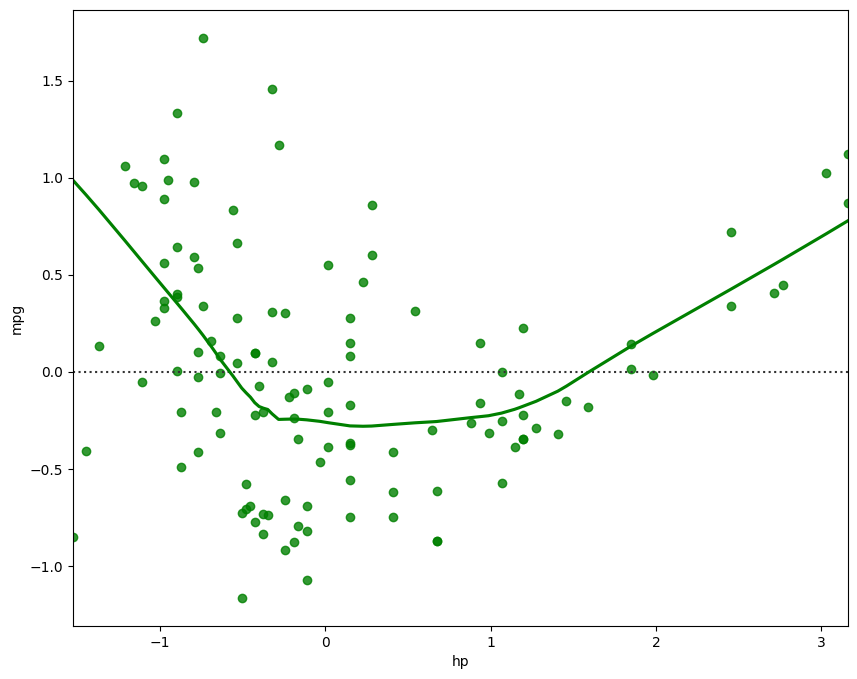

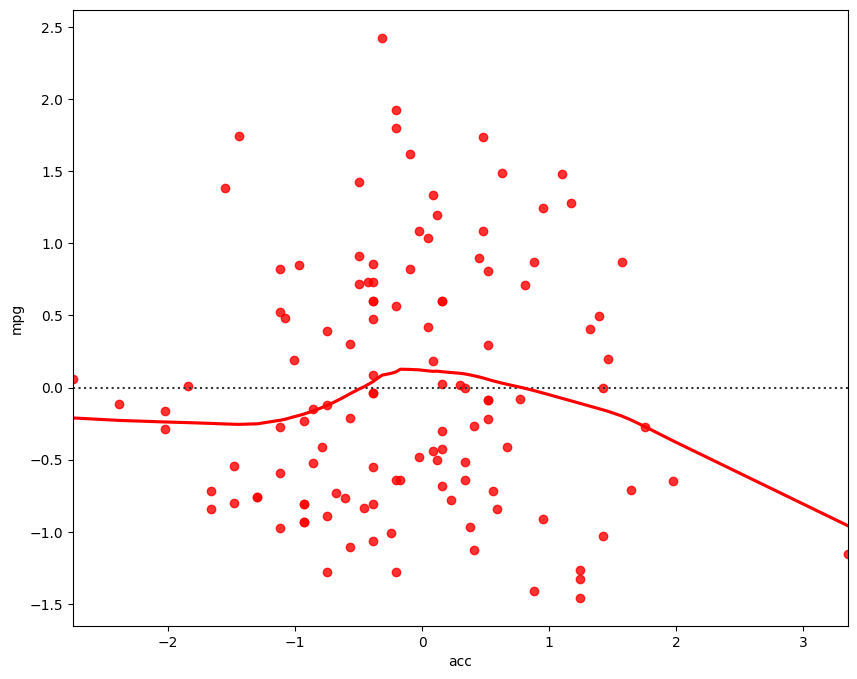

In [21]:
# Is OLS a good model ? Lets check the residuals for some of these predictor.

fig = plt.figure(figsize=(10,8))
sns.residplot(x=x_test['hp'],y=y_test['mpg'],color='green',lowess=True)

fig = plt.figure(figsize=(10,8))
sns.residplot(x= x_test['acc'], y= y_test['mpg'], color='red', lowess=True )

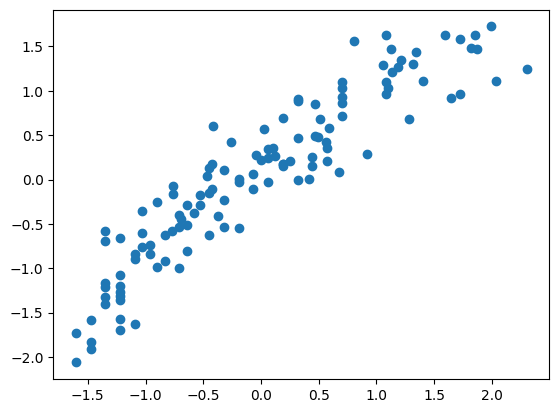

In [22]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(x_test)

# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500
plt.scatter(y_test['mpg'], y_pred)

# 6. Inference

**Both Ridge & Lasso regularization performs very well on this data, though Ridge gives a better score. The above scatter plot depicts the correlation between the actual and predicted mpg values.**
